In [12]:
import pandas as pd
from matplotlib import pyplot as plt
def mark_label(df,k,thresholds):
    #0:stay,1:up，2:down
    # df['m_minus'] = df['avg_price'].rolling(window=k).mean()
    df['m_plus'] = df['avg_price'].shift(-1).rolling(window=k, min_periods=1).mean().shift(-k+1)
    df['l_t'] = (df['m_plus'] - df['avg_price']) / df['avg_price']
    df['label'] = 0
    df.loc[df['l_t'] > thresholds, 'label'] = 1
    df.loc[df['l_t'] < -thresholds, 'label'] = 2

    return df

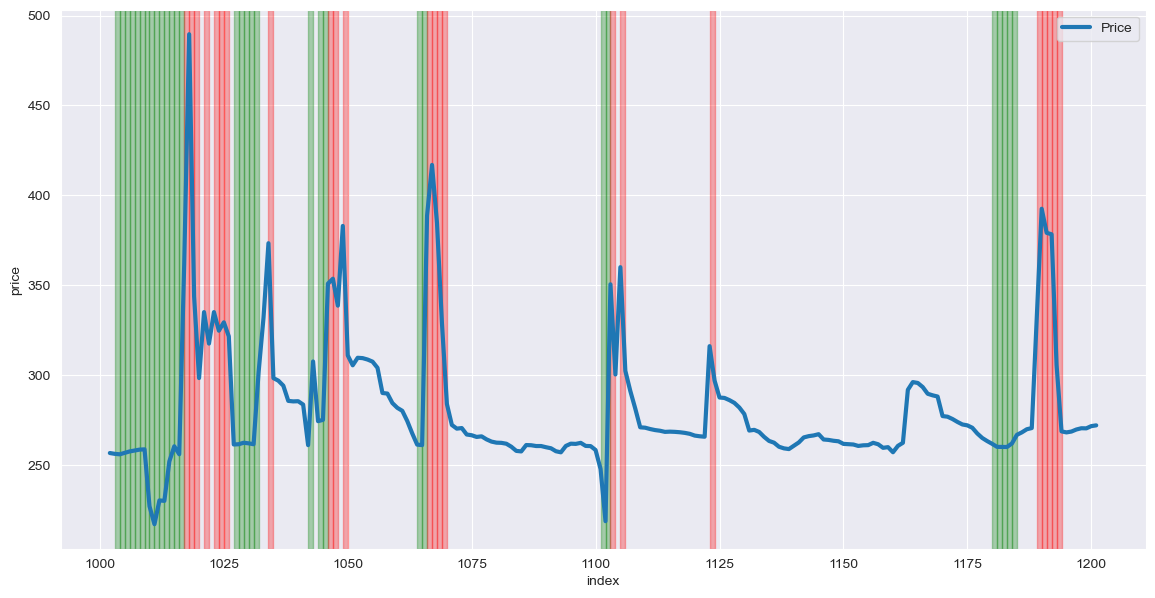

In [15]:
fig, ax = plt.subplots(figsize=(14, 7))
df = pd.read_csv('process_data/total_lob_1s_k10_0.1.csv')
df = df.dropna()
df = mark_label(df, 20, 0.1)
df =df.iloc[1000:1200]

# 绘制价格线
ax.plot(df.index, df['avg_price'], label='Price',lw=3)

# 根据标签着色背景
for index, row in df.iterrows():
    if row['label'] == 1:
        ax.axvspan(index, index+1, color='green', alpha=0.3)
    elif row['label'] == 2:
        ax.axvspan(index, index+1, color='red', alpha=0.3)
    # 对于标签为0的数据点，不进行背景着色

# 设置标题和坐标轴标签
ax.set_xlabel('index')
ax.set_ylabel('price')

# 添加图例
ax.legend()
plt.savefig('price_lable(k=20).png')
# 显示图表
plt.show()